https://mp.weixin.qq.com/s?__biz=MzIwODI2NDkxNQ==&mid=2247487821&idx=1&sn=c9b666d2f3dc8c4dc431b9def23e4a25&chksm=97049af1a07313e7592c44eba66d17a9cfb37fe0be6990aaf4be6a05d7938a05ed2e8baa03d7&mpshare=1&scene=1&srcid=&sharer_sharetime=1583207831005&sharer_shareid=18cb121df0b3138614d2982741de80ad&key=80835432ad7ecc2c0054f30257aa4a5a83d73e2357b511d69aa64666cd450192d8398f01ea2adbc812b3b5feb85a043e534ce5de7d4c5450cc60d7b8467516cf7b6dd774fe00ee480ee97584ffc689a1&ascene=1&uin=MjA1MjAyODkxNg%3D%3D&devicetype=Windows+10&version=62080079&lang=zh_CN&exportkey=AU8CL8lvRJmJs1pQQNNFfcY%3D&pass_ticket=XhLJdQKjjJjN2VZTdw3Vmo7VFeSYtaiXiMW%2FHHrYVt4hnqwiS9RFNBZLbc%2FDlEiX

In [1]:
#用于数据操作的 Pandas和numpy
import pandas as pd
import numpy as np

# 不显示关于在切片副本上设置值的警告
pd.options.mode.chained_assignment = None

# 一个 dataframe 最多显示60例
pd.set_option('display.max_columns', 60)
# 可视化工具包
import matplotlib.pyplot as plt
%matplotlib inline
#设置默认字体大小
plt.rcParams['font.size'] = 24
# 导入设置图片大小的工具
from IPython.core.pylabtools import figsize
#导入用于可视化的Seaborn
import seaborn as sns
sns.set(font_scale = 2)
# 把数据分为训练集和测试集

from sklearn.model_selection import train_test_split

In [2]:

# 把数据读入pandas dataframe
data = pd.read_csv('../../dataset/data_temp/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [4]:
# 将数据转换为正确的类型
#将“Not Available”项替换为可以解释为浮点数的np.nan
data = data.replace({'Not Available':np.nan})

# 一些明确包含数字（例如ft²）的列被存储为object类型。 我们不能对字符串进行数值分析，因此必须将其转换为数字（特别是浮点数）数据类型
# 对列数进行迭代
for col in list(data.columns):
    # 选择需要被数字化的列，通过if 判断实现
    # 凡是包含下列红色字体的列，都需要被转化为数据类型
    if ('ft²'in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col 
        or 'therms' in col or 'gal' in col or 'Score' in col):
        # 将数据类型转换为float
        data[col] = data[col].astype(float)

In [5]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

In [6]:
# 处理缺失值
# 按列计算缺失值的函数
def missing_values_table(df):
        #计算总的缺失值
        mis_val = df.isnull().sum()
        
        #计算缺失值的百分比
        mis_val_percent = 100 * df.isnull().sum() / len(df)
   
        #把结果制成表格
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #对列重命名，第一列：Missing Values，第二列：% of Total Values
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #根据百分比对表格进行降序排列
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        #打印总结信息：总的列数，有数据缺失的列数
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
       
        # 返回带有缺失值信息的dataframe
        return mis_val_table_ren_columns

In [7]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [8]:
# 获取缺失值超过50％的列
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values']> 50].index)
print('We will remove %d columns.'% len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [9]:
# 删除缺失值超过50％的列
data = data.drop(list(missing_columns), axis = 1)

Text(0.5, 1.0, 'Energy Star Score Distribution')

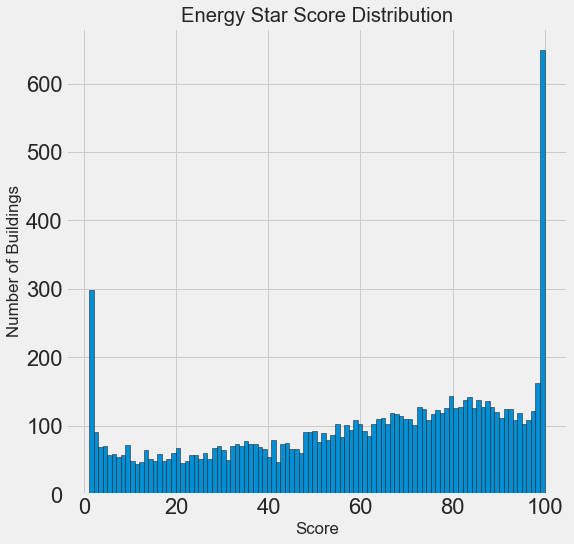

In [10]:

figsize(8,8)

# 将Energy Star Score重新命名为score
data = data.rename(columns = {'ENERGY STAR Score':'score'})

# 绘制直方图

plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(),bins = 100,edgecolor = 'k')
# x,y 坐标轴标签
plt.xlabel('Score');
plt.ylabel('Number of Buildings')
#图表名称
plt.title('Energy Star Score Distribution')

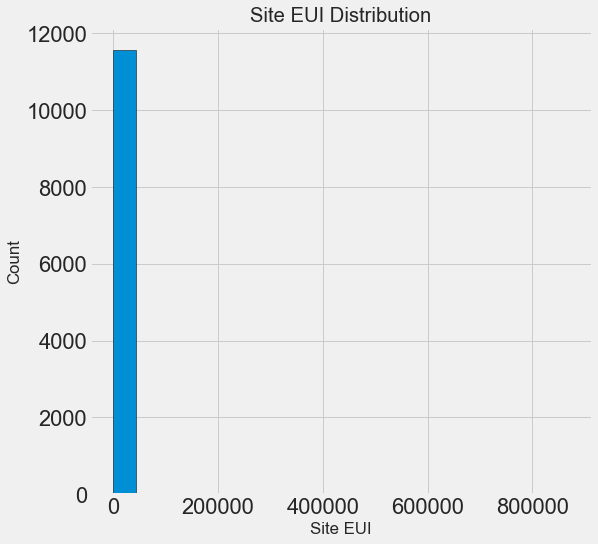

In [11]:
# 绘制能源使用强度（EUI）直方图
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');

In [12]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
# 取出前十名
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [14]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [15]:
# 去除异常值
# 计算第一和第三 四分数
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']
# 第四分位数范围
iqr = third_quartile -first_quartile
# 去除异常值
data = data [(data['Site EUI (kBtu/ft²)']>(first_quartile - 3*iqr)) & (data['Site EUI (kBtu/ft²)']<(third_quartile + 3*iqr))]

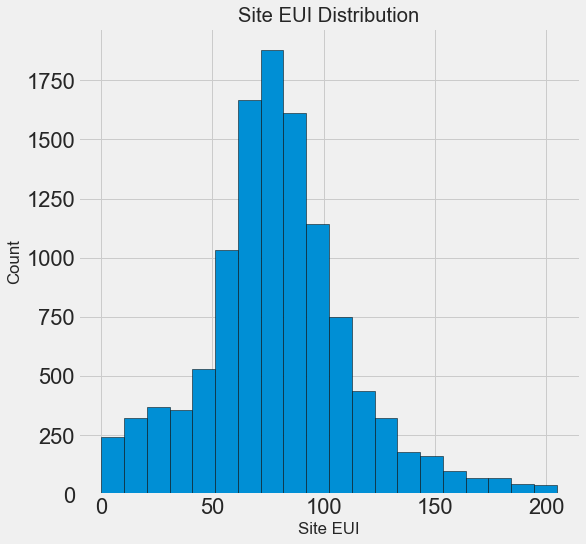

In [16]:
# # 绘制能源使用强度（EUI）直方图

figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');

In [17]:
# 创建一个建筑物列表，对建筑物类型及其数量进行统计
types = data.dropna(subset=['score'])
Alltypes_num = types['Largest Property Use Type'].value_counts()

In [18]:
types = list(Alltypes_num[Alltypes_num.values > 90].index)

In [19]:
print(types)

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse', 'K-12 School', 'Residence Hall/Dormitory']


C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


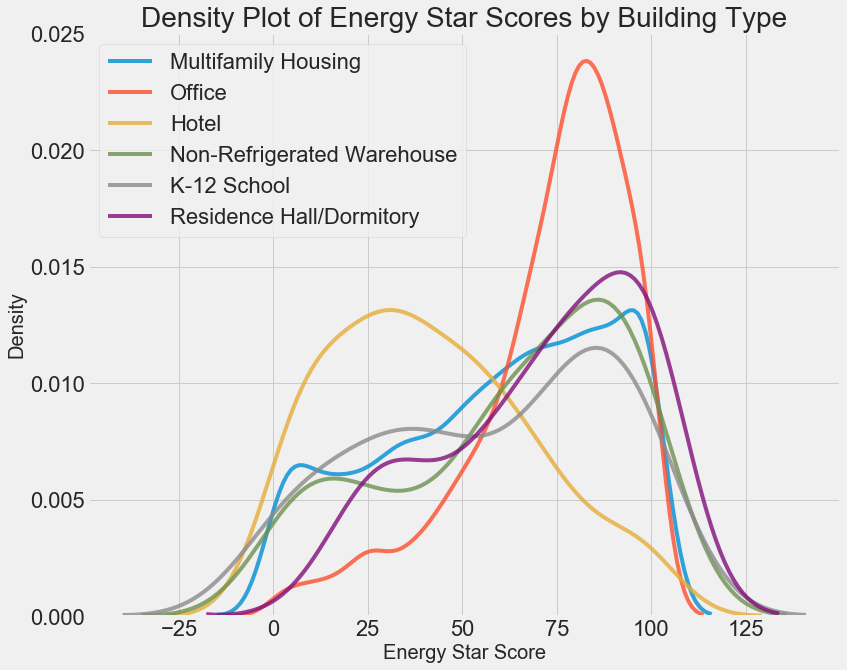

In [20]:
# 建筑类别分数分布图
figsize(12,10)

# 绘制每个建筑物
for b_type in types:
    # 选择建筑类型
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # 能源之星得分的密度图
    sns.kdeplot(subset['score'].dropna(),label = b_type,shade = False, alpha = 0.8)
    
plt.xlabel('Energy Star Score', size = 20); 
plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

In [21]:

boroughs = data.dropna(subset=['score'])
Allboroughs_num = boroughs['Borough'].value_counts()

In [22]:
boroughs = list(Allboroughs_num[Allboroughs_num.values > 100].index)

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

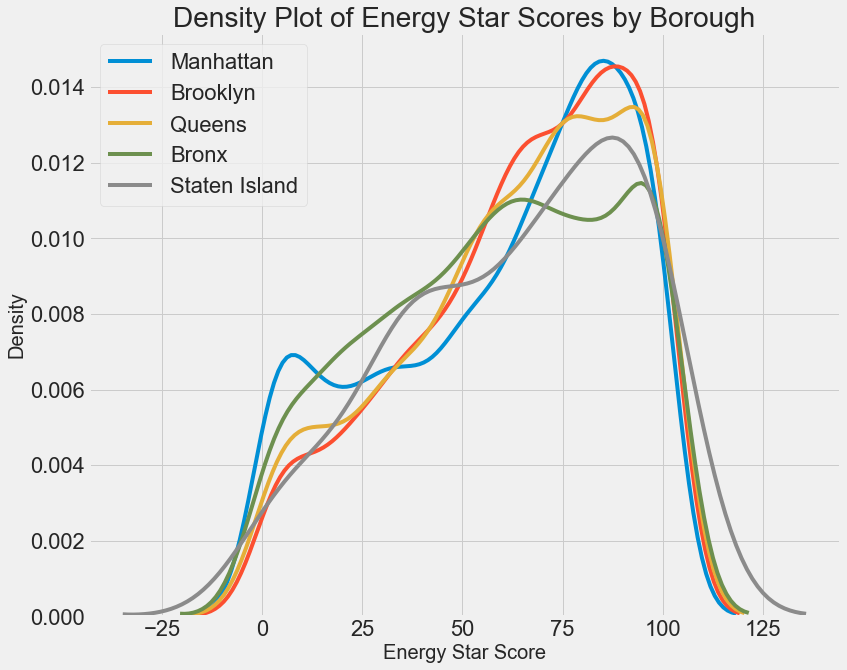

In [23]:

figsize(12,10)

for borough in boroughs:
    subset = data[data['Borough']==borough]
    sns.kdeplot(subset['score'].dropna(),label = borough);
    
plt.xlabel('Energy Star Score', size = 20); 
plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28)

In [24]:
# 特征与目标之间的相关性
# 找到所有相关性并排序
correlations_data = data.corr()['score'].sort_values()

# 打印最负相关性
print(correlations_data.head(15),'\n')

# 打印最正相关性
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [25]:

# 选择数字列
numeric_subset = data.select_dtypes('number')

# 使用数字列的平方根和对数创建列
for col in numeric_subset.columns:
     # 跳过the Energy Star Score 这一列
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_ '+ col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# 选择分类列        
categorical_subset = data[['Borough','Largest Property Use Type']]

# ne hot 编码
categorical_subset = pd.get_dummies(categorical_subset)

# 使用concat对两个数据帧进行拼接，确保使用axis = 1来执行列绑定
features = pd.concat([numeric_subset,categorical_subset],axis =1)

# 放弃没有能源之星评分的建筑物
features = features.dropna(subset = ['score'])

# 找到与得分之间的相关性
correlations = features.corr()['score'].dropna().sort_values()

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
# 显示最负相关的关系
correlations.head(15)

Site EUI (kBtu/ft²)                                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)                          -0.713993
sqrt_ Site EUI (kBtu/ft²)                                       -0.699817
sqrt_ Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_ Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_ Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                        -0.645542
Source EUI (kBtu/ft²)                                           -0.641037
log_Source EUI (kBtu/ft²)                                       -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                    -0.620329
log_Site EUI (kBtu/ft²)                                         -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                      -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)     -0.424246
sqrt_ Weather Normalized Site Electric

In [27]:
# 显示最正相关的关系
correlations.tail(15)

sqrt_ Order                                                        0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_ Community Board                                              0.058029
sqrt_ Council District                                             0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

C:\Users\jianghaitao1\AppData\Roaming\Python\Python36\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Energy Star Score vs Site EUI')

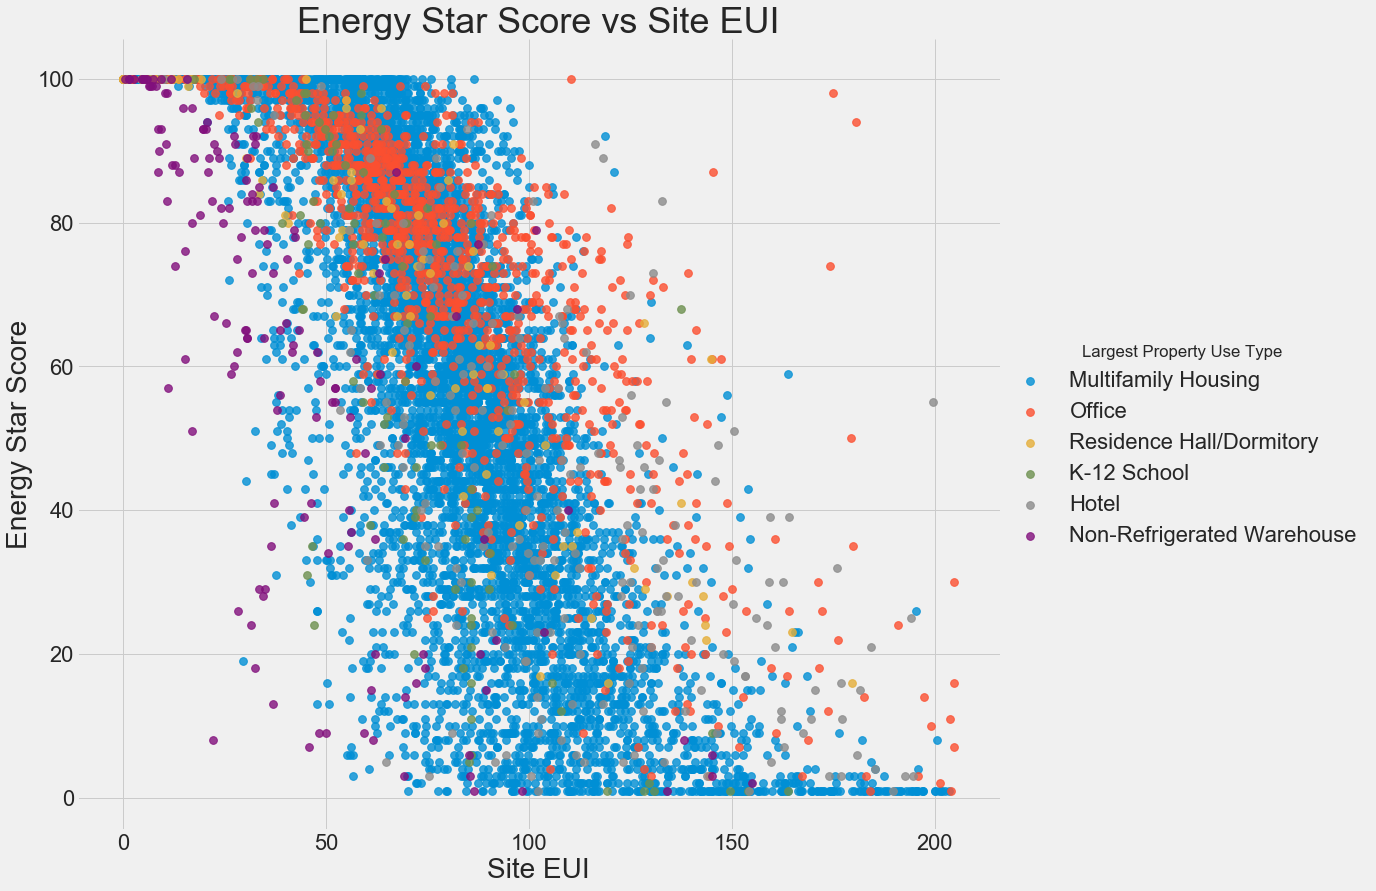

In [28]:
# 双变量图
figsize(12,10)

# 提取建筑类型
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# 限制超过100个观测值的建筑类型（来自之前的代码）
features = features[features['Largest Property Use Type'].isin(types)]

# 使用seaborn绘制Score与 Log Source EUI 的散点图
sns.lmplot('Site EUI (kBtu/ft²)','score',
          hue = 'Largest Property Use Type',
          data = features,
          scatter_kws = {'alpha':0.8,'s': 60},
          fit_reg = False,
          size = 12,
          aspect = 1.2)

plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36)

C:\Users\jianghaitao1\AppData\Roaming\Python\Python36\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.02, 'Pairs Plot of Energy Data')

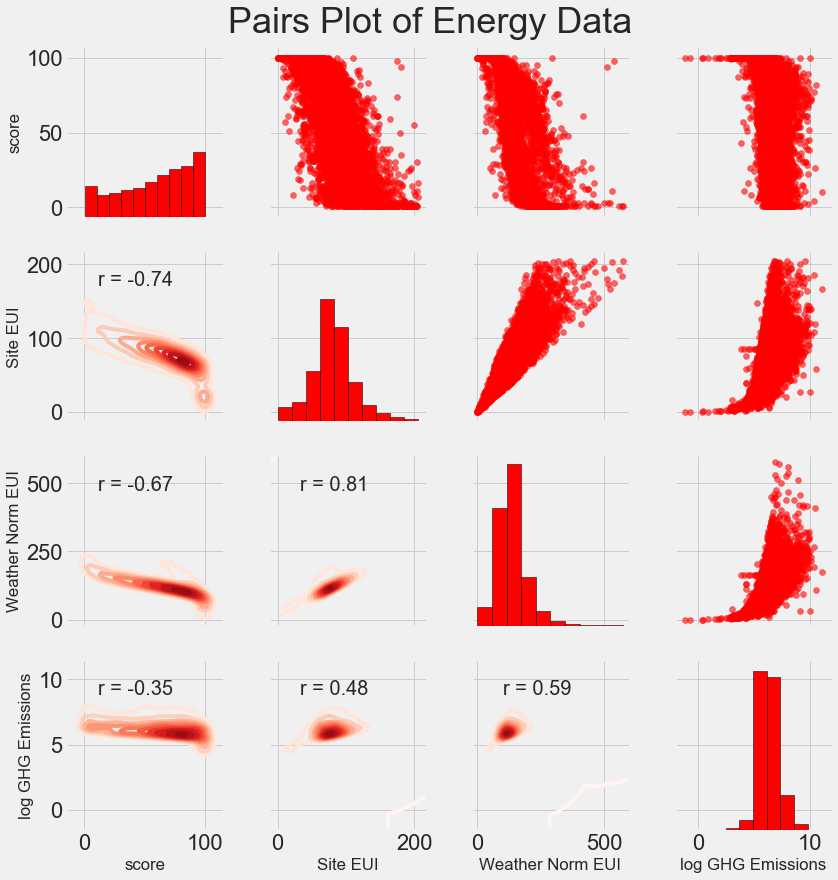

In [29]:
# 提取要绘制的列
plot_data = features[['score',
                     'Site EUI (kBtu/ft²)',
                     'Weather Normalized Source EUI (kBtu/ft²)',
                     'log_Total GHG Emissions (Metric Tons CO2e)']]

# 把 inf 换成 nan
plot_data = plot_data.replace({np.inf: np.nan,-np.inf:np.nan})

# 重命名
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI',
                                        'Weather Normalized Source EUI (kBtu/ft²)':'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# 删除 na 值
plot_data = plot_data.dropna()

# 计算某两列之间的相关系数
def corr_func(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy = (.2,.8),
                xycoords = ax.transAxes,
                size = 20)
    
# 创建 pairgrid 对象
grid = sns.PairGrid(data = plot_data,size=3)

# 上三角是散点图
grid.map_upper(plt.scatter,color = 'red', alpha =0.6)

# 对角线是直方图
grid.map_diag(plt.hist,color ='red',edgecolor = 'black')

# 下三角是相关系数和二维核密度图
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot,cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02)

In [30]:
# 特征工程
# 复制原始数据
features = data.copy()

# 选择数字列
numeric_subset  = data.select_dtypes('number')

# 使用数字列的对数创建新列
for col in numeric_subset.columns:
    # 跳过the Energy Star Score 这一列
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# 选择分类列
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# 使用concat对两个数据帧进行拼接，确保使用axis = 1来执行列绑定
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11319, 110)

Text(0.5, 1.0, 'Weather Norm EUI vs Site EUI, R = 0.9968')

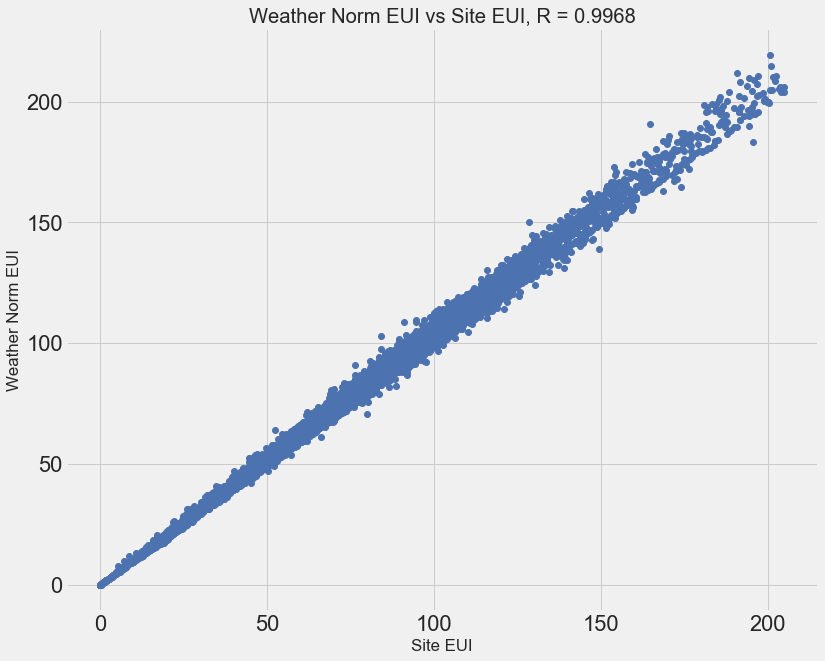

In [31]:
# 特征选择
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)','Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'],plot_data['Weather Normalized Site EUI (kBtu/ft²)'],'bo')

plt.xlabel('Site EUI'); 
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)',
                                                                        'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1])

In [32]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
       删除数据帧中相关系数大于阈值的共线特征。 删除共线特征可以帮助模型泛化并提高模型的可解释性。
        
    Inputs: 
        阈值：删除任何相关性大于此值的特征
    
    Output: 
        仅包含非高共线特征的数据帧
    '''
    
    # 不要删除能源之星得分之间的相关性
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # 计算相关性矩阵
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # 迭代相关性矩阵并比较相关性
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # 如果相关性超过阈值
            if val >= threshold:
                # 打印有相关性的特征和相关值
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # 删除每对相关列中的一个
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # 将得分添加回数据
    x['score'] = y
               
    return x

In [33]:

# 删除大于指定相关系数的共线特征
features = remove_collinear_features(features, 0.6)

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater_equal


In [34]:
# 删除所有 na 值的列
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

In [35]:
# 划分训练集和测试集
# 提取没有得分的建筑物和带有得分的建筑物
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [36]:

# 将特征和目标分离开
features = score.drop(columns = 'score')
targets = pd.DataFrame(score['score'])

# 用 nan 替换 inf and -inf （required for later imputation）
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# 按照 7：3 的比例划分训练集和测试集

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


In [37]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [38]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164
